<a href="https://colab.research.google.com/github/selcuk-yalcin/TrustworthyML/blob/main/XAI_Bootstrapping_Score_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample


In [ ]:
# Step 1: Load dataset
X, y = load_iris(return_X_y=True)
n_samples = len(X)
B = 100  # number of bootstrap rounds

resub_accuracies = []
oob_accuracies = []


In [ ]:
# Step 2–4: Bootstrapping loop
from sklearn.model_selection import train_test_split

for b in range(B):
    # Bootstrap sample - using train_test_split to get indices for OOB
    X_boot, X_oob, y_boot, y_oob, boot_indices, oob_indices = train_test_split(X, y, np.arange(n_samples), test_size=0.33, random_state=b) # using 33% for OOB

    # Train
    model = DecisionTreeClassifier()
    model.fit(X_boot, y_boot)

    # Resubstitution accuracy
    y_train_pred = model.predict(X_boot)
    resub_accuracies.append(accuracy_score(y_boot, y_train_pred))

    # OOB accuracy
    if len(X_oob) > 0:
        y_oob_pred = model.predict(X_oob)
        oob_accuracies.append(accuracy_score(y_oob, y_oob_pred))

In [ ]:
# Average accuracy
avg_resub = np.mean(resub_accuracies)
avg_oob = np.mean(oob_accuracies)

print(f"Average Resubstitution Accuracy: {avg_resub:.2%}")
print(f"Average OOB Accuracy: {avg_oob:.2%}")

Average Resubstitution Accuracy: 100.00%
Average OOB Accuracy: 94.38%


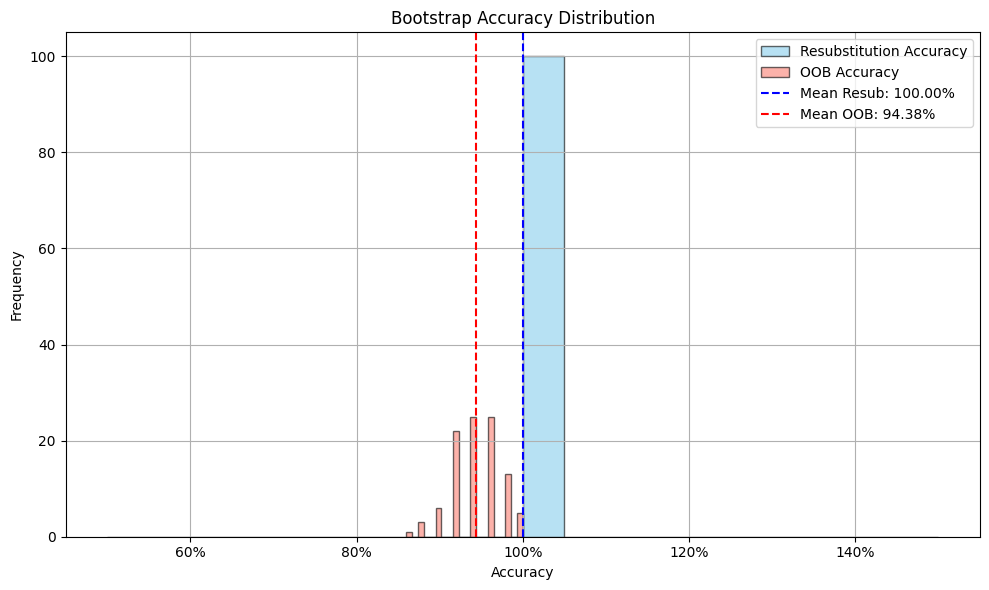

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(resub_accuracies, bins=20, alpha=0.6, label='Resubstitution Accuracy', color='skyblue', edgecolor='black')
plt.hist(oob_accuracies, bins=20, alpha=0.6, label='OOB Accuracy', color='salmon', edgecolor='black')
plt.axvline(avg_resub, color='blue', linestyle='--', label=f'Mean Resub: {avg_resub:.2%}')
plt.axvline(avg_oob, color='red', linestyle='--', label=f'Mean OOB: {avg_oob:.2%}')
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

Average Resubstitution Accuracy: 1.0000
Average OOB Accuracy: 0.9478


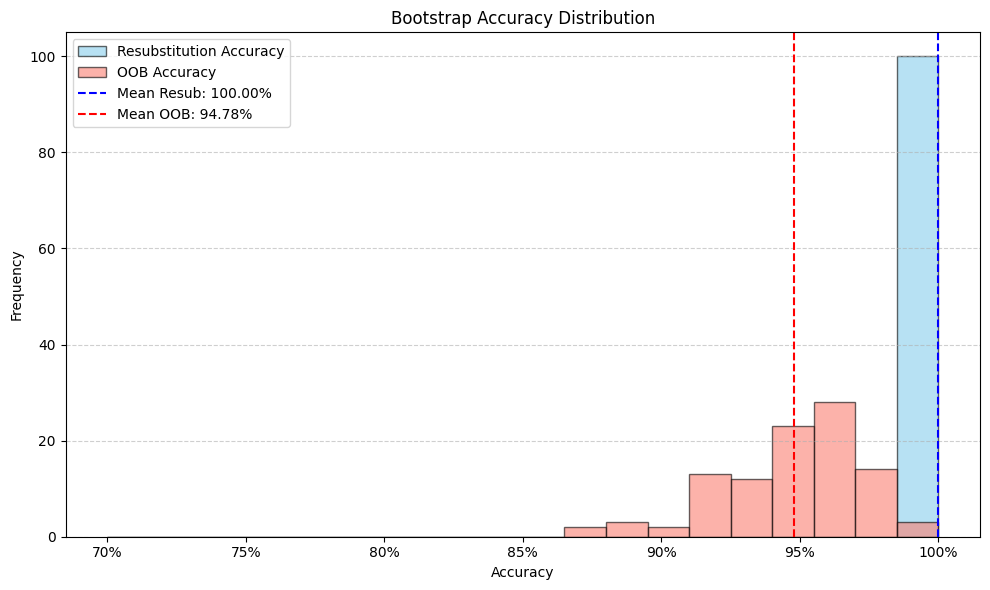

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Step 1: Load dataset
X, y = load_iris(return_X_y=True)
n_samples = len(X)
B = 100  # number of bootstrap rounds

resub_accuracies = []
oob_accuracies = []

# Step 2–4: Bootstrapping loop
for b in range(B):
    # Bootstrap sample
    X_boot, y_boot = resample(X, y, replace=True, n_samples=n_samples, random_state=b)

    # OOB set
# Track bootstrap indices
    boot_indices = resample(np.arange(n_samples), replace=True, n_samples=n_samples, random_state=b)

# Create bootstrap sample
    X_boot = X[boot_indices]
    y_boot = y[boot_indices]

# Identify out-of-bag indices
    oob_indices = np.setdiff1d(np.arange(n_samples), boot_indices)

# Extract OOB data
    X_oob = X[oob_indices]
    y_oob = y[oob_indices]

    # Train
    model = DecisionTreeClassifier()
    model.fit(X_boot, y_boot)

    # Resubstitution accuracy
    y_train_pred = model.predict(X_boot)
    resub_accuracies.append(accuracy_score(y_boot, y_train_pred))

    # OOB accuracy
    if len(X_oob) > 0:
        y_oob_pred = model.predict(X_oob)
        oob_accuracies.append(accuracy_score(y_oob, y_oob_pred))

# Average accuracy
avg_resub = np.mean(resub_accuracies)
avg_oob = np.mean(oob_accuracies)

print(f"Average Resubstitution Accuracy: {avg_resub:.4f}")
print(f"Average OOB Accuracy: {avg_oob:.4f}")

# Visualization
plt.figure(figsize=(10, 6))

# Plot histograms using raw accuracy values (0.0 to 1.0)
plt.hist(resub_accuracies, bins=20, alpha=0.6, label='Resubstitution Accuracy',
         color='skyblue', edgecolor='black', range=(0.7, 1.0))
plt.hist(oob_accuracies, bins=20, alpha=0.6, label='OOB Accuracy',
         color='salmon', edgecolor='black', range=(0.7, 1.0))

# Vertical lines for mean
plt.axvline(avg_resub, color='blue', linestyle='--', label=f'Mean Resub: {avg_resub:.2%}')
plt.axvline(avg_oob, color='red', linestyle='--', label=f'Mean OOB: {avg_oob:.2%}')

# Formatting
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.xticks(np.linspace(0.7, 1.0, 7), [f"{int(x*100)}%" for x in np.linspace(0.7, 1.0, 7)])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Bootstrap Estimated Accuracy (ACC_boot): 1.0000


/tmp/ipython-input-13-195397456.py:32: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=accuracies, orient='h', jitter=0.2, size=6, color='skyblue', edgecolor='gray')


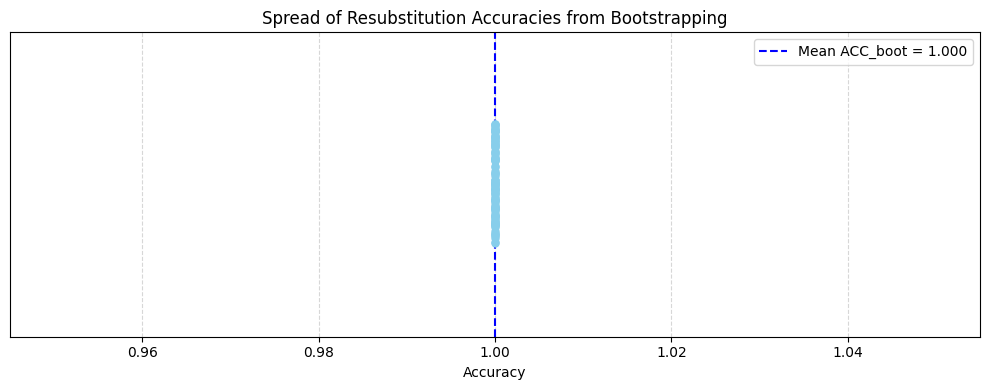